## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [1]:
import math
import sympy as sym


In [2]:
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

In [3]:
def metodo_bisezione(fname, a, b, tolx):
 """
 Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a)
 fb=fname(b)
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 
 maxit = math.ceil(math.log2((b - a) / tolx))-1

 
 while abs(b - a) > tolx:
    xk = a+(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)>0:  #continua su [xk,b]
      a = xk
      fa=fxk
    elif sign(fxk)*sign(fb)>0:   #continua su [a,xk]
      b = xk
      fb=fxk

 
 return xk, it, v_xk




In [4]:
def falsi(fname, a, b, maxit, tolx,tolf):
 """
 Implementa il metodo di falsa posizione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a);
 fb=fname(b);
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di falsa posizione \n")
     return None, None,None

 it = 0
 v_xk = []
 
 fxk=10

 
 while it < maxit and abs(b - a) > tolx and abs(fxk) > tolf:
    xk = a-fa*(b-a)/(fb-fa)
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)>0:  #continua su [xk,b]
      a = xk
      fa=fxk
    elif sign(fxk)*sign(fb)>0:   #continua su [a,xk]
      b = xk
      fb=fxk

 
 return xk, it, v_xk


In [5]:
def corde(fname,m,x0,tolx,tolf,nmax):
    
     # m è il coefficiente angolare della retta che rimane fisso per tutte le iterazioni
        xk=[]
        fx0=fname(x0)
        d=fx0/m
        x1=x0-d
        fx1=fname(x1)
        xk.append(x1)
        it=1
        
        while it<nmax and  abs(fx1)>=tolf and abs(d)>=tolx*abs(x1) :
           x0=x1
           fx0=fname(x0)
           d=fx0/m
           '''
           #x1= ascissa del punto di intersezione tra  la retta che passa per il punto
           (xi,f(xi)) e ha pendenza uguale a m  e l'asse x
           '''
           x1=x0-d  
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [122]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
  
        xk=[]
        fx0=fname(x0)
        if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
            print(" derivata prima nulla in x0")
            return None, None,None
        
        d=fx0/fpname(x0)
        x1=x0-d
        
        fx1=fname(x1)
        xk.append(x1)
        it=1
        
        while it<nmax and  abs(fx1)>=tolf and abs(d)>=tolx*abs(x1) :
           x0=x1
           fx0=fname(x0)
           if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
                print(" derivata prima nulla in x0")
                return None, None,None
           d=fx0/fpname(x0)
           '''
           #x1= ascissa del punto di intersezione tra  la retta che passa per il punto
           (xi,f(xi)) ed è tangente alla funzione f(x) nel punto (xi.f(xi))  e l'asse x
           '''
           x1=x0-d  
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [123]:
def secanti(fname,xm1,x0,tolx,tolf,nmax):
        xk=[]
        fxm1=fname(xm1);
        fx0=fname(x0); 
        d=fx0*(x0-xm1)/(fx0-fxm1)
        x1=x0-d;
        xk.append(x1)
        fx1=fname(x1);
        it=1
       
        while it<nmax and abs(fx1)>=tolf and abs(d)>=tolx*abs(x1):
            xm1=x0
            x0=x1
            fxm1=fname(xm1)
            fx0=fname(x0) 
            d=fx0*(x0-xm1)/(fx0-fxm1)
            x1=x0-d
            fx1=fname(x1)
            xk.append(x1);
            it=it+1;
           
       
        if it==nmax:
           print('Secanti: raggiunto massimo numero di iterazioni \n')
        
        return x1,it,xk

In [126]:
def stima_ordine(xk,iterazioni):
     #Vedi dispensa allegata per la spiegazione

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine


Scegli funzione di cui calcolare lo zero 2


1/((x + 3)*log(2))


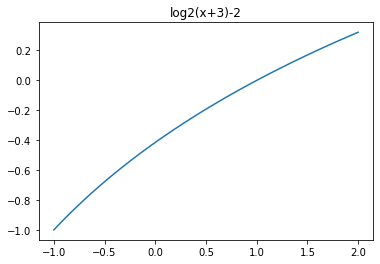

Ordine Bisezione  1.0
Ordine Falsa posizione  0.9998929113294419
Ordine Corde  0.9999755300449991
Ordine Newton  2.0007077949472403
Ordine Secanti  1.7319074349157517
Lo zero approssimato è: 1.0000000000002274
f(1.0000000000002274) = 8.215650382226158e-14
[5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11 1.45519152e-11
 7.27595761e-12 3.63797881e-12 1.81898940e-12 9.09494702e-13
 4.54747351e-13 2.27373675e-13]
Lo zero approssimato è: 1.000000000002117
f(1.0000000000002274) = 7.638334409421077e-13
Lo zero appros

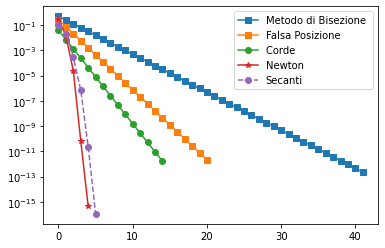

In [125]:
# Esempio di utilizzo
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify
 
scelta=int(input("Scegli funzione di cui calcolare lo zero"))

if scelta==1:
    x=sym.symbols('x')
    fs =  sym.exp(-x)-(x+1)
    dfs=sym.diff(fs,x,1)
    print(dfs)
    titolo='exp(-x)-(x+1)'
    fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
#può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
    f=lambdify(x,fs,np)

    alfa=0
    a = -1
    b = 2
    x0=-0.5
    xm1=-0.3

if scelta==2:
    x=sym.symbols('x')
    fs =  sym.log(x+3)/sym.log(2)-2 #log_b(a)=log(a)/log(b)
    dfs=sym.diff(fs,x,1)
    print(dfs)
    titolo='log2(x+3)-2'
    fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
#può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
    f=lambdify(x,fs,np)

    alfa=1
    a = -1
    b = 2
    x0=-0.5
    xm1=0.5
    
if scelta==3:
    x=sym.symbols('x')
    fs =  sym.sqrt(x)-x**2/4
    dfs=sym.diff(fs,x,1)
    print(dfs)
    titolo='sqrt(x)-x**2/4'
    fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
#può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
    f=lambdify(x,fs,np)

    alfa=2.0**(4/3)
    a = 1
    b = 3
    x0=1.8
    xm1=1.5
       
xx=np.linspace(a,b,100)
plt.plot(xx,f(xx))
plt.title(titolo)
plt.show()
tolx = 1e-12
tolf=1e-12
maxit=1000
zero,it,xk = metodo_bisezione(f, a, b, tolx)
print("Ordine Bisezione ",stima_ordine(xk,it))
zero_f,it_f,xk_f = falsi(f, a, b, maxit, tolx,tolf)
print("Ordine Falsa posizione ",stima_ordine(xk_f,it_f))
coeff_ang=(f(b)-f(a))/(b-a)
zero_c,it_c,xk_c = corde(f, coeff_ang,x0, tolx,tolf, maxit)
print("Ordine Corde ",stima_ordine(xk_c,it_c))
zero_n,it_n,xk_n = newton(f, fp,x0, tolx,tolf, maxit) 
print("Ordine Newton ",stima_ordine(xk_n,it_n))
zero_s,it_s,xk_s = secanti(f,xm1,x0,tolx,tolf, maxit) 
print("Ordine Secanti ",stima_ordine(xk_s,it_s))

xk=np.array(xk)

if (zero!=None):
    print(f"Lo zero approssimato è: {zero}")
    print(f"f({zero}) = {f(zero)}")
    ek=np.abs(xk-alfa)
    print(ek)
    plt.semilogy(range(it),ek,'-s')

xk_f=np.array(xk_f)
if (zero_f!=None):
    print(f"Lo zero approssimato è: {zero_f}")
    ek_f=np.abs(xk_f-alfa)
    print(f"f({zero}) = {f(zero_f)}")
    plt.semilogy(range(it_f),ek_f,'-s')

xk_c=np.array(xk_c)
if (zero_c!=None):
    print(f"Lo zero approssimato è: {zero_c}")
    ek_c=np.abs(xk_c-alfa)
    print(f"f({zero}) = {f(zero_c)}")
    plt.semilogy(range(it_c),ek_c,'-o')
    

xk_n=np.array(xk_n)
if (zero_n!=None):
    print(f"Lo zero approssimato è: {zero_n}")
    ek_n=np.abs(xk_n-alfa)
    print("Errore Newton",ek_n)
    print(f"f({zero}) = {f(zero_n)}")
    plt.semilogy(range(it_n),ek_n,'-*')
    
    xk_s=np.array(xk_s)
if (zero_s!=None):
    print(f"Lo zero approssimato è: {zero_s}")
    ek_s=np.abs(xk_s-alfa)
    print("Errore secanti",ek_n)
    print(f"f({zero}) = {f(zero_s)}")
    plt.semilogy(range(it_s),ek_s,'o--')
    plt.legend(["Metodo di Bisezione ", "Falsa Posizione", "Corde ", "Newton ", "Secanti"])
    plt.show()

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

## Esercizio 2
Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

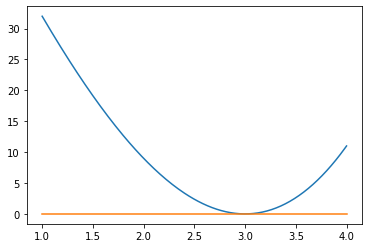

In [134]:
f1= lambda x: x**3+x**2-33*x+63
fp= lambda x: 3*x**2+2*x-33
xx=np.linspace(1,4,200)
plt.plot(xx,f1(xx),xx,np.zeros_like(xx))

In [140]:
x0=1.0
tolx=1e-12
tolf=1e-12
zero_nf1,it_nf1,xk_nf1 = newton(f1, fp,x0, tolx,tolf, maxit) 
print("Zero Newton a partire da x0=1.0 ---",zero_nf1, "Numero di iterazioni ",it_nf1)
print("Ordine Newton ",stima_ordine(xk_nf1,it_nf1))

Zero Newton a partire da x0=1.0 --- 2.999999813817361 Numero di iterazioni  23
Ordine Newton  1.0008987815015167


In [143]:
def newton_mod(fname,fpname,m,x0,tolx,tolf,nmax):
  #m: molteplicità della radice
        xk=[]
        fx0=fname(x0)
        if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
            print(" derivata prima nulla in x0")
            return None, None,None

        d=fx0/fpname(x0)
        x1=x0-m*d
        
        fx1=fname(x1)
        xk.append(x1)
        it=1
        
        while it<nmax and  abs(fx1)>=tolf and abs(d)>=tolx*abs(x1) :
           x0=x1
           fx0=fname(x0)
           if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
                print(" derivata prima nulla in x0")
                return None, None,None
           d=fx0/fpname(x0)
           '''
           #x1= ascissa del punto di intersezione tra  la retta che passa per il punto
           (xi,f(xi)) ed è tangente alla funzione f(x) nel punto (xi.f(xi))  e l'asse x
           '''
           x1=x0-m*d  
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [144]:
x0=1.0
tolx=1e-12
tolf=1e-12
m=2 #molteplicità della radice
zero_nm_f1,it_nm_f1,xk_nm_f1 = newton_mod(f1, fp,m,x0, tolx,tolf, maxit) 
print("Ordine Newton modificato",stima_ordine(xk_nm_f1,it_nm_f1))
print("Zero Newton a partire da x0=1.0 ---",zero_nm_f1, "Numero di iterazioni ",it_nm_f1)


Ordine Newton modificato 1.9965427710643453
Zero Newton a partire da x0=1.0 --- 2.9999999996871622 Numero di iterazioni  4


## Esercizio 3
Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

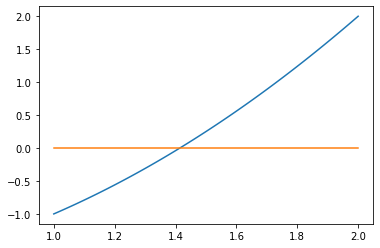

Ordine Bisezione  1.0


In [145]:
f4= lambda x: x**2-2
f4p= lambda x: 2*x
a=1
b=2
xx=np.linspace(a,b,100)
plt.plot(xx,f4(xx),xx,np.zeros_like(xx))
plt.show()
tolx = 1e-12
tolf=1e-12
maxit=1000
zero_b_4,it_b_4,xk_b_4 = metodo_bisezione(f4, a, b, tolx)
print("Ordine Bisezione ",stima_ordine(xk_b_4,it_b_4))
 


In [146]:
alfa=np.sqrt(2)
err_rel_bis_4=np.abs(np.array(xk_b_4)-alfa)


In [147]:
x0=1
zero_n4,it_n4,xk_n4 = newton(f4, f4p,x0, tolx,tolf, maxit) 
err_rel_new_4=np.abs(np.array(xk_n4)-alfa)
print("Ordine Newton ",stima_ordine(xk_n4,it_n4))

Ordine Newton  2.0000120123420904


In [148]:
err_rel_n_4=np.abs(np.array(xk_n4)-alfa)

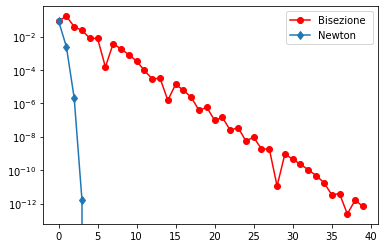

In [149]:
plt.semilogy(range(it_b_4),err_rel_bis_4,'r-o',range(it_n4),err_rel_new_4,'d-')
plt.legend(['Bisezione ', 'Newton'])

Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)



Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

In [150]:
import numpy.linalg as npl
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)

scelta_sistema=int(input("Scelta sistema"))

if scelta_sistema==1:
        F= lambda x : np.array([
            x[0]**2 + x[1]**2-9,
            x[0]+x[1]-3,
        ])
    
        Jac= lambda x: np.array([[2*x[0], 2*x[1]],[1,1]])

        Z=X**2+Y**2-9
        Z1=X+Y-3

elif scelta_sistema==2:
        
        F= lambda x : np.array([
            2*x[0] -np.cos(x[1]),
            np.sin(x[0])+2*x[1]])
        Jac= lambda x: np.array([[2, np.sin(x[1])],[np.cos(x[0]),2]])
        Z=2*X -np.cos(Y)
        Z1=np.sin(X)+2*Y
elif scelta_sistema==3:

        F= lambda x : np.array([
                    4*x[0]**2+x[1]**2-4,
                    x[0]+x[1]-np.sin(x[0]-x[1])
                   ])
        Jac= lambda x: np.array([[8*x[0], 2*x[1]],[1-np.cos(x[0]-x[1]),1+np.cos(x[0]-x[1])]])
        Z=4*X**2+Y**2-4
        Z1=X+Y-np.sin(X-Y)

        

Scelta sistema 2


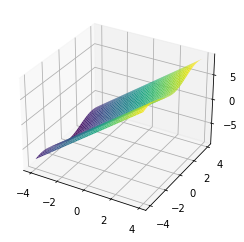

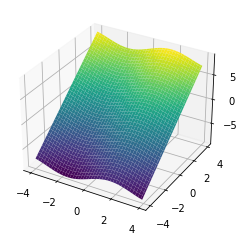

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z1, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show()

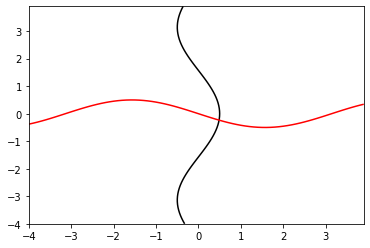

In [152]:
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='red')
 
plt.show()

In [153]:
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : stringa
    Nome del file contenente la funzione non lineare.
  jac : stringa
    Nome del file contenente la matrice Jacobiana della funzione.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
    Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None

  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
    matjac = jac(x0)
    if np.linalg.det(matjac) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None

    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Jacobiana e come termine noto la Funzione vettoriale F valutata
    # in x0
    s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

In [154]:
def my_newtonSys_corde(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : stringa
    Nome del file contenente la funzione non lineare.
  jac : stringa
    Nome del file contenente la matrice Jacobiana della funzione.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)  #Utilizzo per tutte le iterazioni la matrice Jacobiana valutata nell'ierato iniziale, senza mai aggiornarla
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None
  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]

  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
   
   
    if np.linalg.det(matjac) == 0:
        print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
        return None, None,None
    
    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Jacobiana e come termine noto la Funzione vettoriale F valutata
    # in x0
    
    s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

In [155]:
def my_newtonSys_sham(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : stringa
    Nome del file contenente la funzione non lineare.
  jac : stringa
    Nome del file contenente la matrice Jacobiana della funzione.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None,None,None

  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]
  update=10  #Numero di iterazioni durante le quali non si aggiorna la valutazione dello Jacobiano nell'iterato attuale
  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    x0 = x1
    it += 1
    if it%update==0:   #Valuto la matrice di iterazione nel nuovo iterato ogni "update" iterazioni
        matjac=jac(x0)
   
        if np.linalg.det(matjac) == 0:
           print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
           return None,None,None
        else:
         # Risolvo il sistema lineare avente come matrice dei coefficienti la
        # matrice Jacobiana valutatata nell'iterato aggiornato x0  e come termine noto la Funzione vettoriale F valutata
        # in x0
           s = -np.linalg.solve(matjac, fun(x0))
    else:
         # Risolvo il sistema lineare avente come matrice dei coefficienti la
        # matrice Jacobiana non aggiornata e come termine noto la Funzione vettoriale F valutata
        # in x0
           s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

In [156]:
x0=np.array([-1,1])
nmax=500
xN,contN,XmN= my_newtonSys(F,Jac,x0,1e-10,1e-10,nmax)

xNC,contNC,XmNC= my_newtonSys_corde(F,Jac,x0,1e-10,1e-10,nmax)
 
xNsham,contNsham,XmNsham= my_newtonSys_sham(F,Jac,x0,1e-10,1e-10,nmax)
 

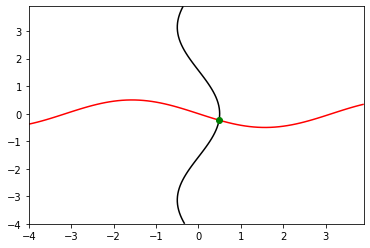

In [157]:
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='red')
plt.plot(xN[0],xN[1],'go')
plt.show()

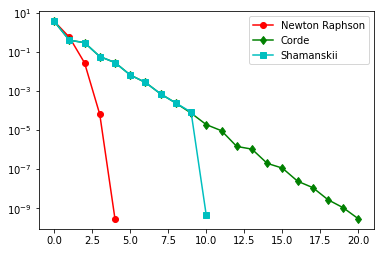

In [158]:
plt.semilogy(range(contN),XmN,'r-o',range(contNC),XmNC,'g-d',range(contNsham),XmNsham,'c-s')
plt.legend(['Newton Raphson','Corde','Shamanskii'])